# __Understanding business problem__


## __Features of the data__

1. LoanID = Unique Loan ID
2. Gender = Male/ Female
3. Married = Applicant married (Y/N)
4. Dependents = Number of dependents
5. Education = Applicant Education (Graduate/ Under Graduate)
6. SelfEmployed = Self-employed (Y/N)
7. ApplicantIncome = Applicant income
8. CoapplicantIncome = Coapplicant income
9. LoanAmount = Loan amount in thousands
10. LoanAmountTerm = Term of the loan in months
11. CreditHistory = Credit history meets guidelines 
12. PropertyArea = Urban/ Semi-Urban/ Rural
13. LoanStatus = (Target) Loan approved (Y/N)

# __Import libraries__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

from sklearn.preprocessing import RobustScaler, QuantileTransformer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data_train = pd.read_csv('./loan_train.csv')
raw_data_test = pd.read_csv('./loan_test.csv')

In [3]:
raw_data_train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
raw_data_test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [5]:
raw_data_train.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [6]:
#Check the size of train/test dataset
print("The size of train dataset is: ", raw_data_train.shape)
print("The size of test dataset is: ", raw_data_test.shape)

The size of train dataset is:  (614, 13)
The size of test dataset is:  (367, 12)


So we have 614 rows and 13 columns in the dataset.

In [7]:
raw_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
raw_data_train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [9]:
raw_data_train.describe(include='object')

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422

# __Data Preperation__

## __Copy the raw data__

In [10]:
data = raw_data_train.copy(deep=True)

In [11]:
data = data.drop(columns=['Loan_ID'])

In [12]:
data['Credit_History'] = data['Credit_History'].astype('object')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('object')
data['Dependents'] = data['Dependents'].astype('object')

In [13]:
data['LoanStatus'] = data['Loan_Status'].replace({'Y': 1, 'N': 0})
data['Dependents'] = data['Dependents'].replace({'3+': 3})

In [14]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [15]:
numcols = data.select_dtypes(include=np.number).columns
objcols = data.select_dtypes(include='object').columns

# __Data Analysis__

## __Finding & Handling missing values__

### __Finding Missing Values__

In [16]:
data[data.isnull().any(axis=1)].shape[0]

134

In [17]:

def missing_values_dataframe():
    # Initializing the lists to store the column names, missing values, and percentage of missing values
    name = []  # column names list
    value = []  # total missing values list
    percentage = []  # missing percentage list
    data_type = [] # data type list

    # Looping through each column in the data
    for column in data.columns:

        # Check if the column has any missing values
        if data[column].isnull().any():

            # If yes, then append the column name to 'name' list
            name.append(column)

            # Append the number of missing values to 'value' list
            value.append(data[column].isnull().sum())

            # Append the percentage of missing values to 'percentage' list
            percentage.append(
                f'{round(data[column].isna().sum()/data.shape[0]*100, 3)}%')

            data_type.append(data[column].dtypes)

        # If there are no missing values in the entire dataset
        elif data.isnull().any() is False:

            # Print a message indicating that there are no missing values in the dataset
            print("There is no missing values present in this dataset")

    # Creating a dataframe with the lists 'name', 'value', and 'percentage'
    global df
    df = pd.DataFrame(
        {
            'Name': name, 
            'Value': value, 
            'Percentage': percentage,
            'Dtype' : data_type
        }
    ).sort_values(by='Percentage', ascending=False).reset_index(drop=True)

    return df
missing_values_dataframe()

Name  Value Percentage    Dtype
0    Credit_History     50     8.143%   object
1     Self_Employed     32     5.212%   object
2        LoanAmount     22     3.583%  float64
3        Dependents     15     2.443%   object
4  Loan_Amount_Term     14      2.28%   object
5            Gender     13     2.117%   object
6           Married      3     0.489%   object

## __Duplicated Values__

In [18]:
data.duplicated().sum()

0

## __Univariate Analysis__

### __Unique values in Features__

In [19]:
pd.DataFrame({
    'Column_Name'         : list(data.nunique().index), 
    'No.of Unique Values' : list(data.nunique()), 
    'Data_type'           : [data[column].dtypes for column in data.columns]
    }).sort_values(by='Data_type').reset_index(drop=True)

Column_Name  No.of Unique Values Data_type
0     ApplicantIncome                  505     int64
1          LoanStatus                    2     int64
2   CoapplicantIncome                  287   float64
3          LoanAmount                  203   float64
4        Total_Income                  554   float64
5              Gender                    2    object
6             Married                    2    object
7          Dependents                    4    object
8           Education                    2    object
9       Self_Employed                    2    object
10   Loan_Amount_Term                   10    object
11     Credit_History                    2    object
12      Property_Area                    3    object
13        Loan_Status                    2    object

In [20]:
for column in objcols:
    if column != 'Loan_Status':
        print(pd.DataFrame(data[column].value_counts()), end='\n\n')

        Gender
Male       489
Female     112

     Married
Yes      398
No       213

   Dependents
0         345
1         102
2         101
3          51

              Education
Graduate            480
Not Graduate        134

     Self_Employed
No             500
Yes             82

       Loan_Amount_Term
360.0               512
180.0                44
480.0                15
300.0                13
240.0                 4
84.0                  4
120.0                 3
60.0                  2
36.0                  2
12.0                  1

     Credit_History
1.0             475
0.0              89

           Property_Area
Semiurban            233
Urban                202
Rural                179



## __Distribution of Feature Columns__

### __Distribution of Feature Categorical Columns__

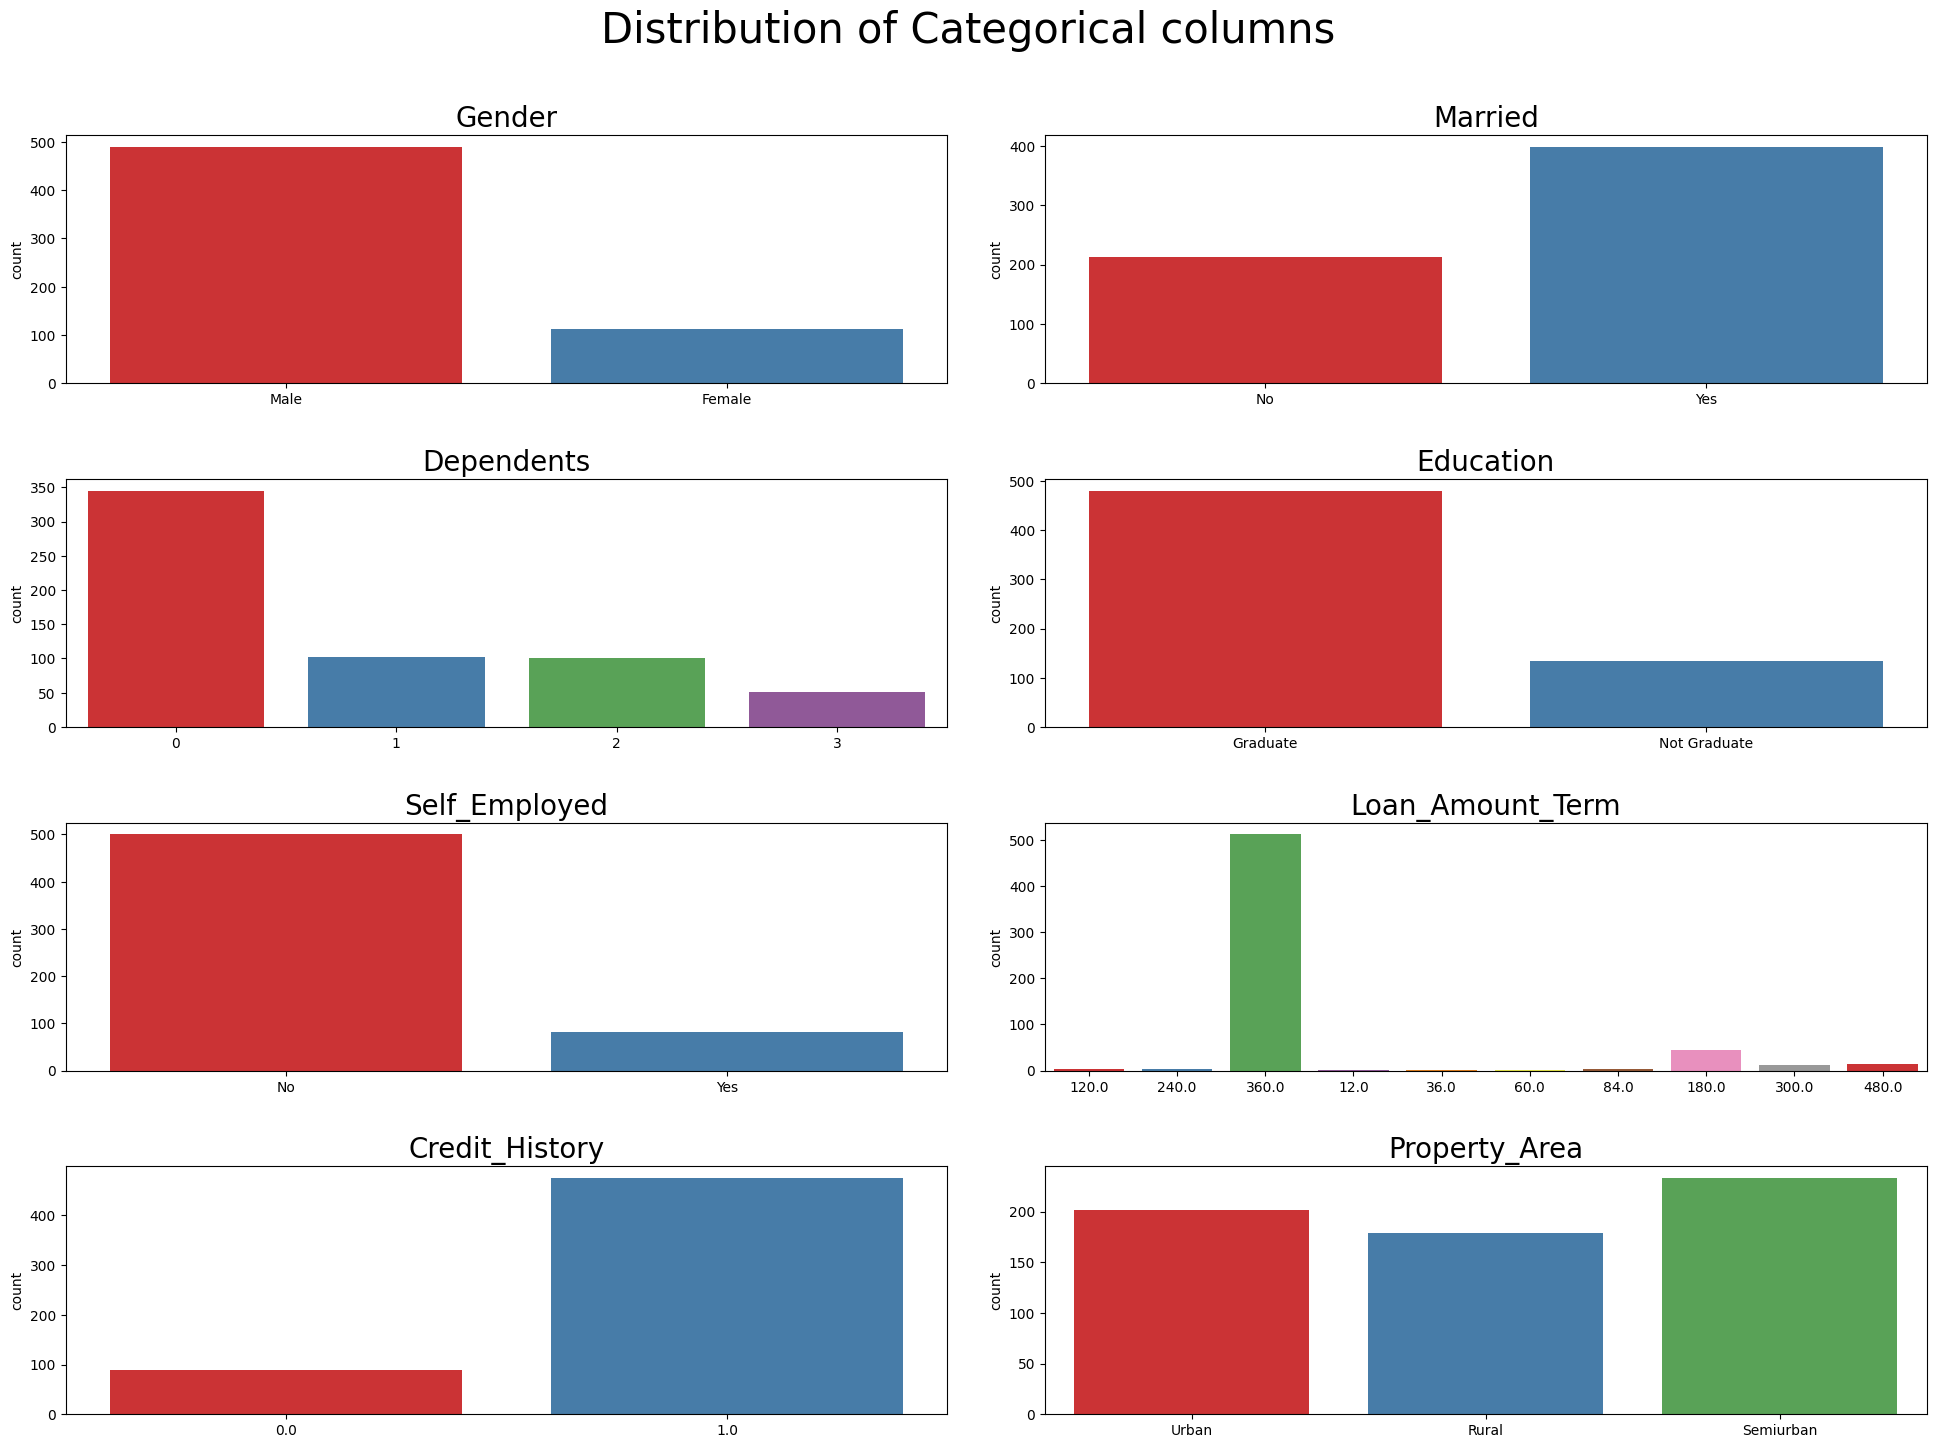

In [21]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 15))

axes = axes.flat

for index, column in enumerate(objcols):
    if column != 'Loan_Status':
        sns.countplot(
            data=data,
            x=column,
            palette='Set1',
            ax=axes[index]
        )
        axes[index].set_xlabel('')
        axes[index].set_title(column, size=20)

fig.suptitle('Distribution of Categorical columns', size=30)
fig.tight_layout(pad=3)
plt.show()

### __Distribution of Feature Numerical Columns__

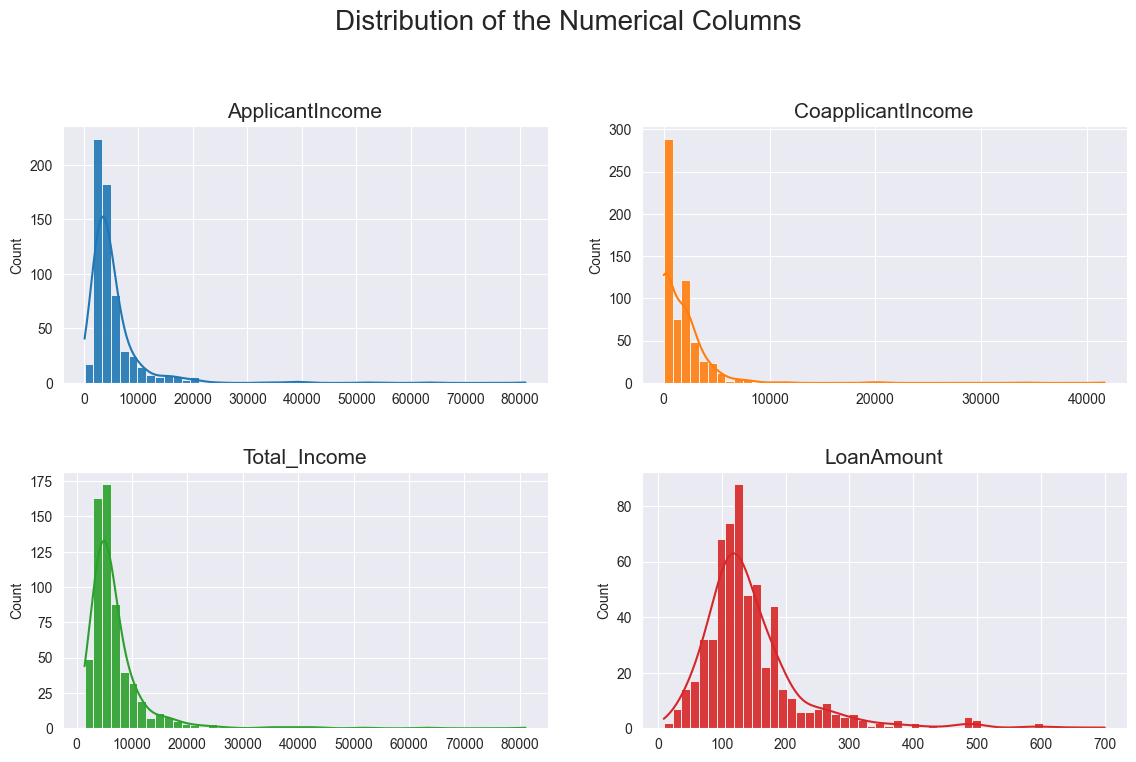

In [22]:
sns.set_style('darkgrid')
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmount']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axes = axes.flat
for index, column in enumerate(numeric_features):
    sns.histplot(
        data=data,
        x=column,
        kde=True,
        bins=50,
        color=list(plt.rcParams['axes.prop_cycle']*2)[index]['color'],
        alpha=0.9,
        ax=axes[index]
)
# removes the x-axis label of the current subplot
    axes[index].set_xlabel('')

    # sets the title of the current subplot to the current column name
    axes[index].set_title(column, size=15)

# set the title for the plot    
plt.suptitle('Distribution of the Numerical Columns', size=20)

# adjusts the spacing between subplots to optimize the layout
plt.tight_layout(pad=3)

# displays the figure on the screen
plt.show()

## __Distribution of Target column__

In [23]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
px.pie(data_frame=data, names='Loan_Status', title='Target Distribution')

## __Finding Skewness__

In [25]:
non_dist_cols = ['ApplicantIncome', 'Total_Income', 'LoanAmount']

In [26]:
data[non_dist_cols].skew(numeric_only=True)

ApplicantIncome    6.539513
Total_Income       5.633449
LoanAmount         2.677552
dtype: float64

### __Checking Skew value changes for different Transformers__

In [27]:
skew = {}
log_skew = []
sqrt_skew = []
boxcox_skew = []
quant_skew = []

scaler = QuantileTransformer(output_distribution='normal')
quantile_frame = pd.DataFrame(scaler.fit_transform(data[non_dist_cols].values), columns=data[non_dist_cols].columns)

for column in non_dist_cols:
        skewness = data[column].skew()
        skew[column] = skewness
        log_skew.append(np.log(data[column]).skew())
        sqrt_skew.append(np.sqrt(data[column]).skew())
        boxcox_skew.append(stats.skew(stats.boxcox(data[column])[0]))
        quant_skew.append(quantile_frame[column].skew())
skew_df = pd.DataFrame({
    'Column_Name' : skew.keys(),
    'Skew_Value'  : skew.values(),
    'Log_Skew'    : log_skew,
    'Sqrt_Skew'   : sqrt_skew,
    'BoxCox_Skew' : boxcox_skew,
    'Quant_Skew'  : quant_skew
})
skew_df.set_index('Column_Name', inplace=True)
skew_df

Skew_Value  Log_Skew  Sqrt_Skew  BoxCox_Skew  Quant_Skew
Column_Name                                                              
ApplicantIncome    6.539513  0.479580   2.967286    -0.092286   -0.001050
Total_Income       5.633449  1.076702   2.816326    -0.034577    0.000162
LoanAmount         2.677552 -0.192998   1.305382          NaN    0.000332

### __Distribution Transformation Plot__

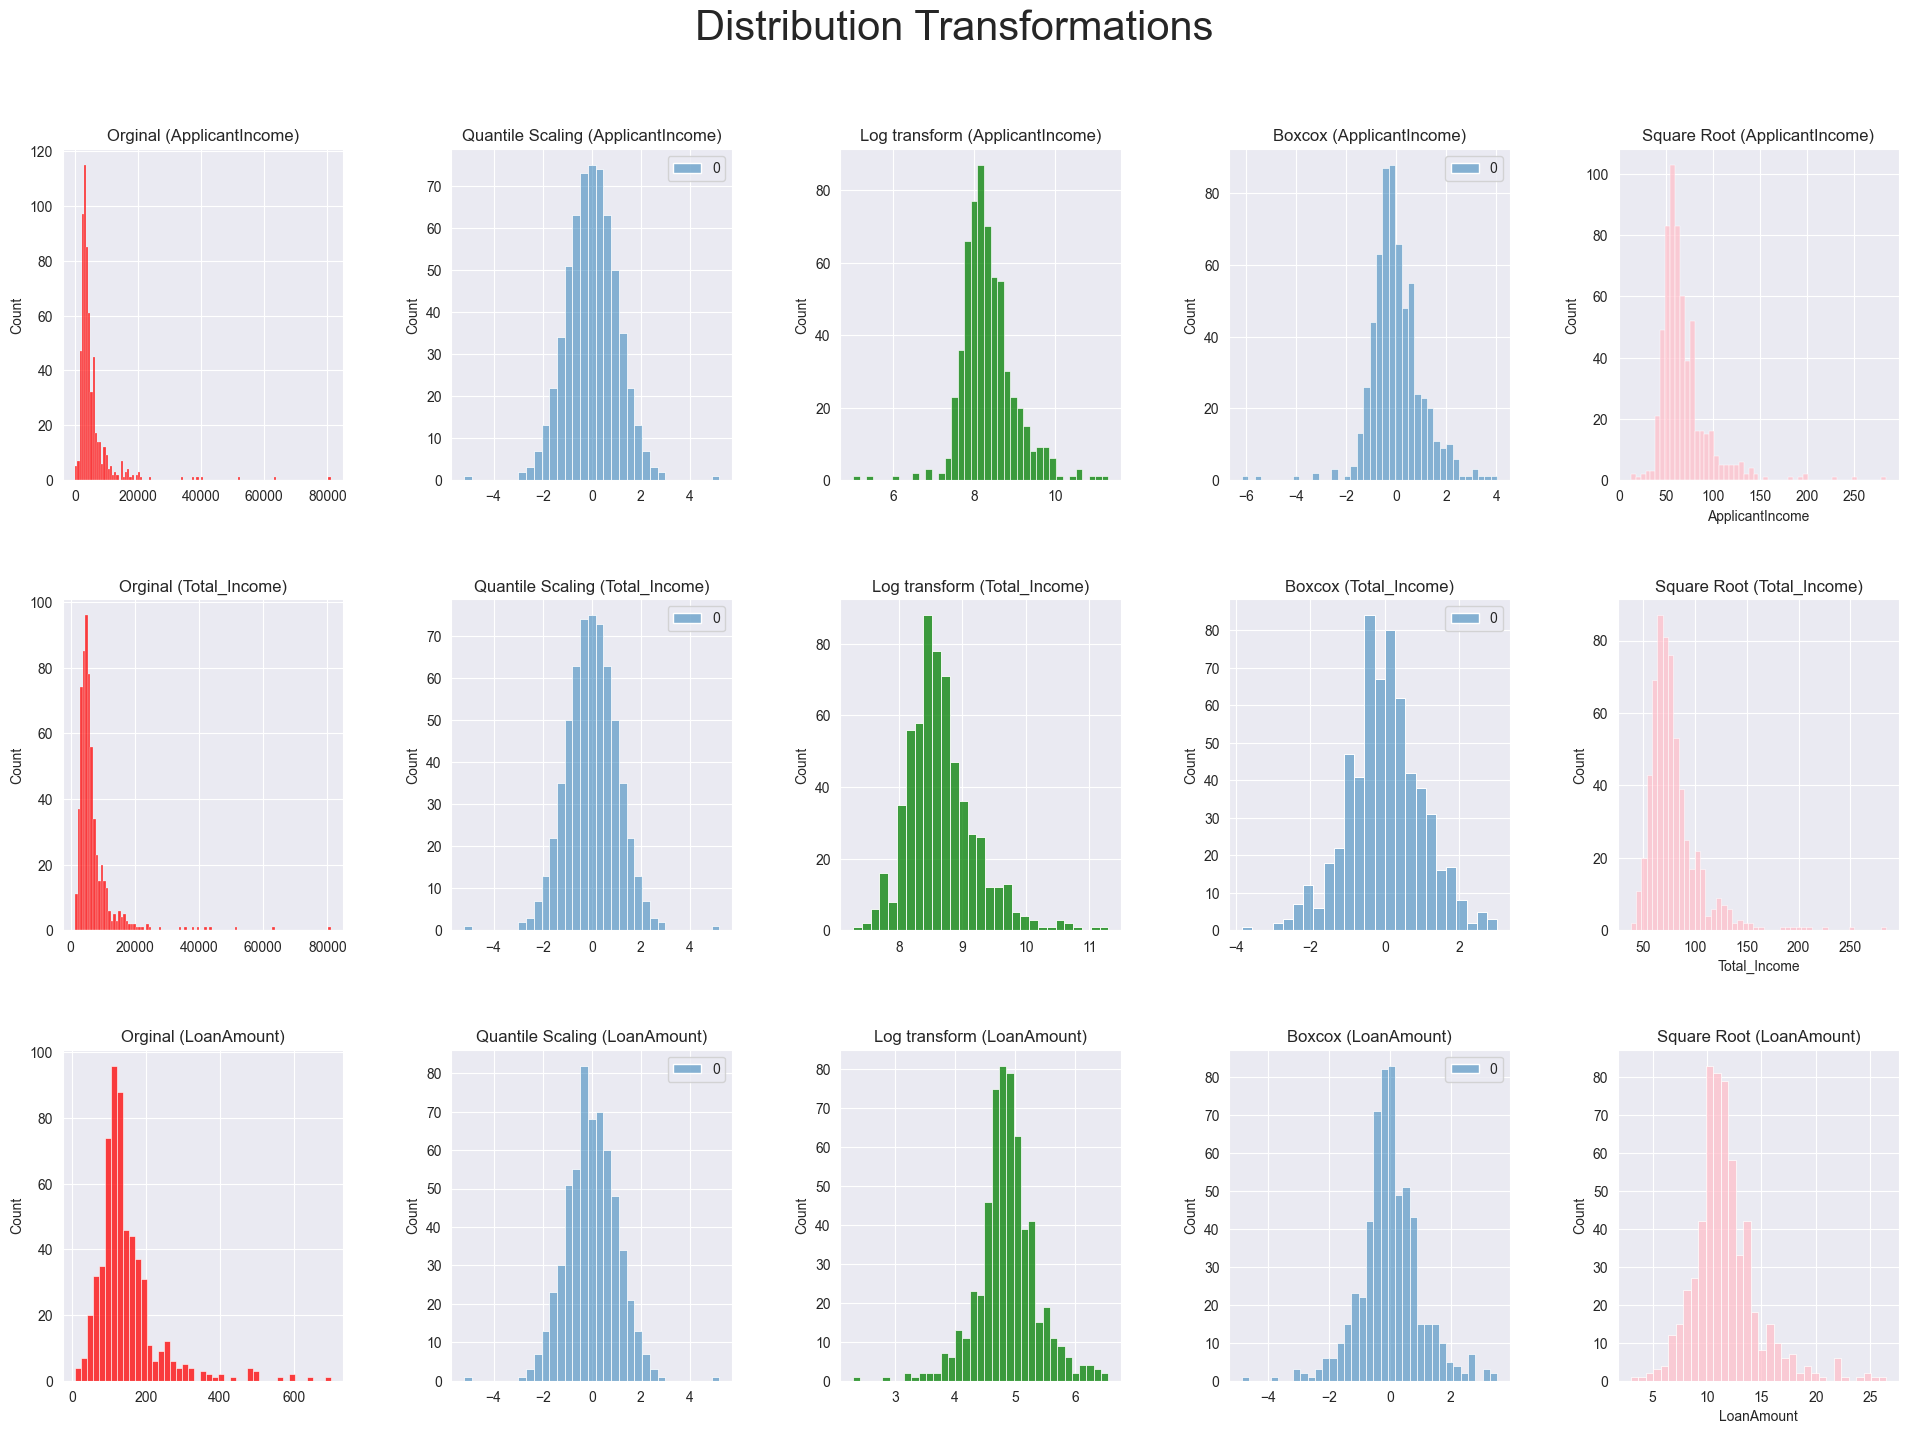

In [28]:
from sklearn.preprocessing import PowerTransformer

fig,axes = plt.subplots(ncols=5, nrows=3, figsize = (20,15))

for index,column in enumerate(non_dist_cols):

    scaler1 = QuantileTransformer(output_distribution="normal")
    quant_df = scaler1.fit_transform(data[[column]])
    
    scaler2 = PowerTransformer(method='box-cox')
    boxcox_df = scaler2.fit_transform(data[[column]])

    sns.histplot(x= data[column], ax=axes[index,0], color ='r')
    sns.histplot(quant_df, ax=axes[index,1], color='blue')
    sns.histplot(np.log1p(data[column]), ax=axes[index,2], color='green')
    sns.histplot(np.sqrt(data[column]), ax=axes[index,4], color='pink')
    sns.histplot(boxcox_df, ax=axes[index,3], color='orange')

    axes[index,0].set_title(f"Orginal ({column})")
    axes[index,0].set(xlabel=None)
    axes[index,1].set_title(f"Quantile Scaling ({column})")
    axes[index,2].set_title(f"Log transform ({column})")
    axes[index,2].set(xlabel=None)
    axes[index,3].set_title(f"Boxcox ({column})")
    axes[index,4].set_title(f"Square Root ({column})")

plt.suptitle("Distribution Transformations",fontsize = 30)
plt.tight_layout(pad = 4)
plt.show()

## __Relationship between Categorical Features and Label__

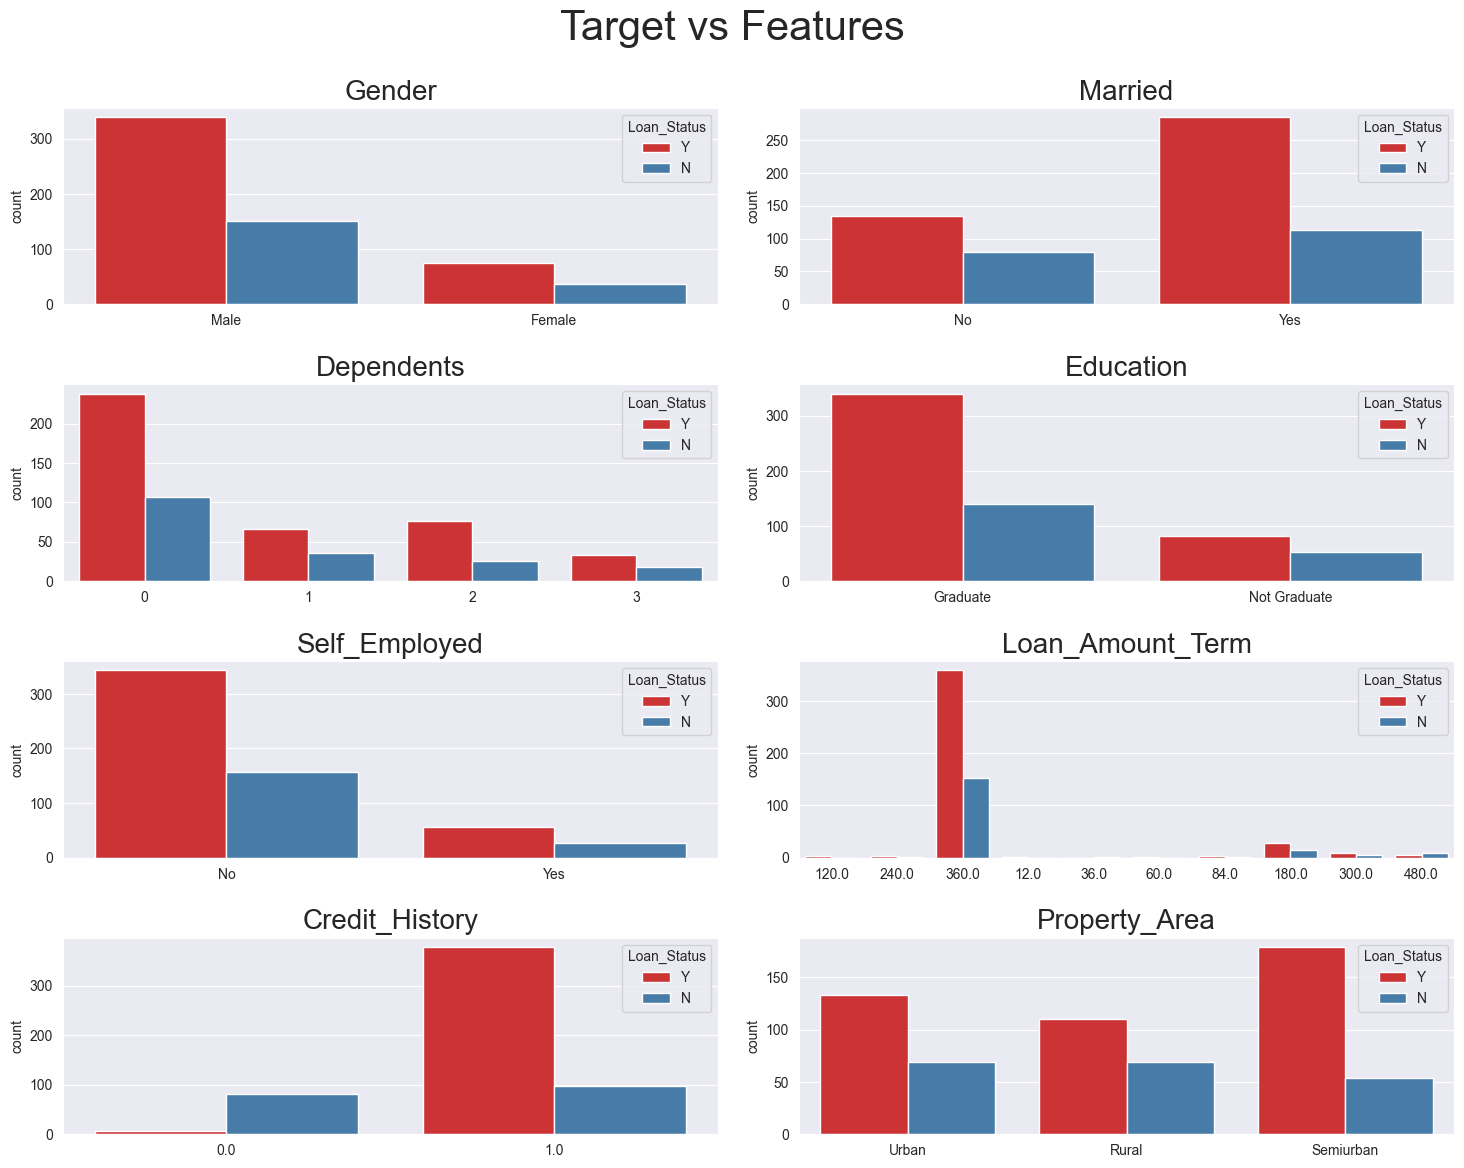

In [29]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15, 12))
axes = axes.flat
for index, column in enumerate(objcols):
    if column != 'Loan_Status':
        sns.countplot(
            data=data,
            x=column,
            hue=data['Loan_Status'],
            ax=axes[index],
            palette='Set1'
        )
        axes[index].set_xlabel('')
        axes[index].set_title(column, size=20)

plt.suptitle('Target vs Features', size=30)
plt.tight_layout(pad=2)

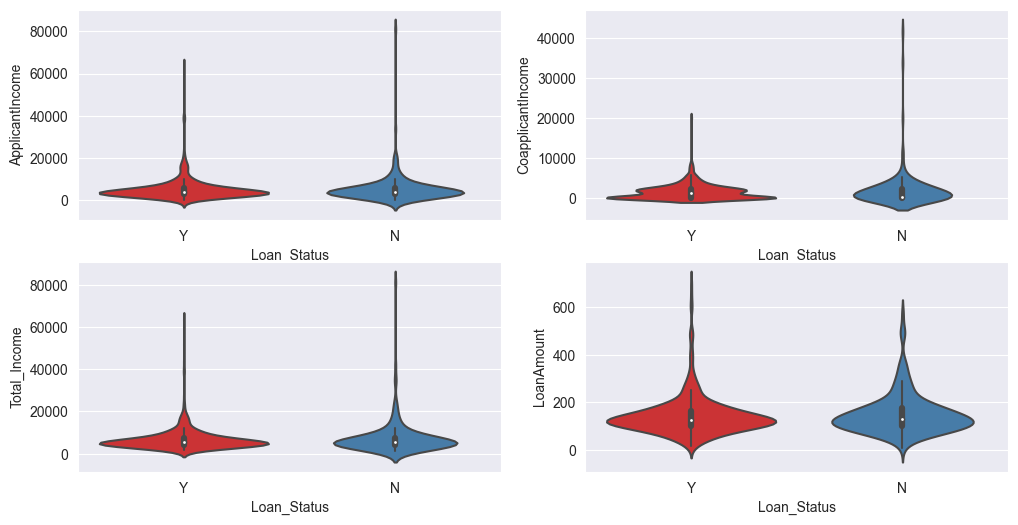

In [30]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmount']
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 6))
axes = axes.flat
for index, column in enumerate(numeric_features):
    if column != 'Loan_Status':
        sns.violinplot(
            data=data,
            x='Loan_Status',
            y=column,
            ax=axes[index],
            palette='Set1'
        )

In [31]:
data.corr(method='pearson').style.background_gradient(cmap='plasma')

Text(0.5, 1.0, 'Correlation of all features and target')

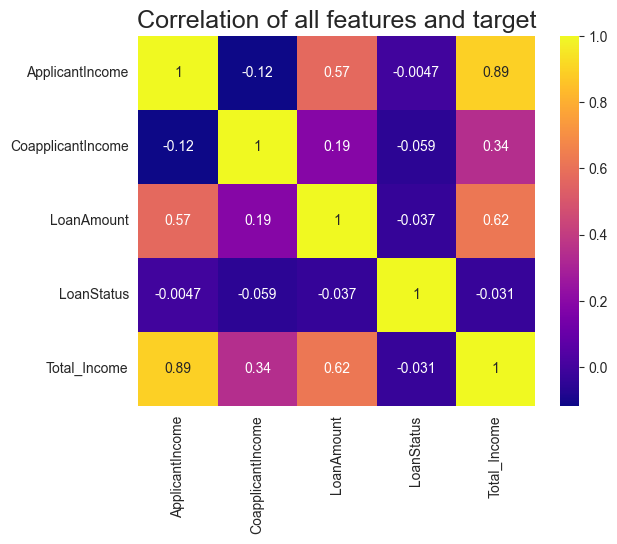

In [32]:
sns.heatmap(data.corr(), annot=True, cmap='plasma')
plt.title("Correlation of all features and target", fontsize= 18)

## __Finding Outliers__

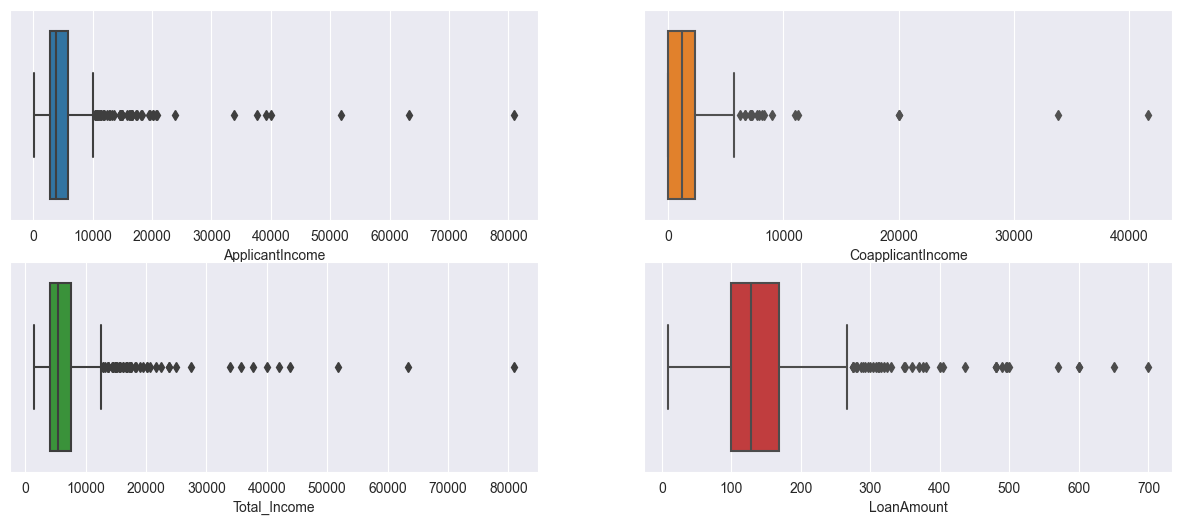

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,6))
axes = axes.flat

for index, column in enumerate(numeric_features):
    sns.boxplot(
        data=data,
        x=column,
        color=list(plt.rcParams['axes.prop_cycle']*2)[index]['color'],
        ax=axes[index]
    )

# __Feature Engineering__

## __Handling Missing Values__

### __Categorical Imputation__

In [34]:
for column in ['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']:
    data[column] = data[column].fillna(data[column].mode()[0])

### __Numerical Imputation__

In [35]:
for column in ['LoanAmount', 'Loan_Amount_Term']:
    data[column] = data[column].fillna(data[column].median())

In [36]:
if data.isnull().any() is True:
    print(data.insull().sum())
else :
    print('There is no missing values present in this dataset.')

There is no missing values present in this dataset.


## __Drop Unwanted Features__

In [37]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanStatus', 'Total_Income'],
      dtype='object')

In [38]:
data.drop(columns=['Loan_Status', 'CoapplicantIncome'], inplace=True)

In [39]:
data

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes          3      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     LoanAmount  Loan_Amount_Term  Credit_History Property_Area  LoanStatus  \
0         128.0             360.0             1.0         Urban           1   
1         128.0             360.0             1.0         Rural           0   
2          66.0             360.0             1.0         Urban           1   
3         120.0             360.0             1.0         Urban           1   
4         141.0             360.0             1.0         Urban           1   
..          ...               ...             ...           ...         ...   
609        71.0             360.0             1.0         Rural           1   
610        40.0             180.0             1.0         Rural           1   
611       253.0             360.0             1.0         Urban           1   
612       187.0             360.0             1.0         Urban           1   
613       133.0             360.0             0.0     Semiurban           0   

     Total_Income  
0          5849.0  
1          6091.0  
2          3000.0  
3          4941.0  
4          6000.0  
..            ...  
609        2900.0  
610        4106.0  
611        8312.0  
612        7583.0  
613        4583.0  

[614 rows x 12 columns]

In [40]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(include=np.number).columns
feature_cols = data.iloc[:, :-1].columns
print(f'Categorical Columns are :\n {cat_cols} \n\n{num_cols} \n\n{feature_cols}')

Categorical Columns are :
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object') 

Index(['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'LoanStatus', 'Total_Income'],
      dtype='object') 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'LoanStatus'],
      dtype='object')


## __Handling Skew__

In [41]:
numeric_skew_cols = ['ApplicantIncome', 'LoanAmount', 'Total_Income']

In [42]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
data[numeric_skew_cols] = transformer.fit_transform(data[numeric_skew_cols].values)

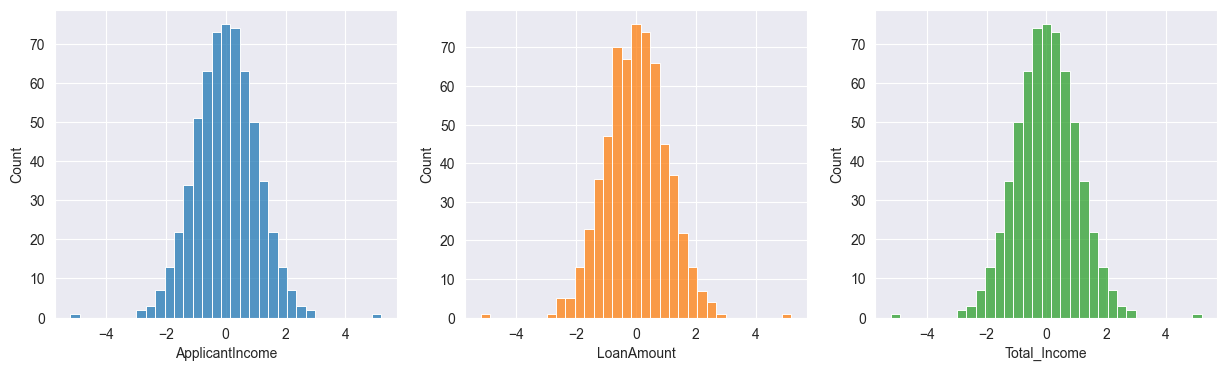

In [43]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))
axes = axes.flat

for index, column in enumerate(numeric_skew_cols):
    sns.histplot(
        data=data,
        x=column,
        color=(list(plt.rcParams['axes.prop_cycle']*2)[index]['color']),
        ax=axes[index]
    )

## __Handling Outliers__

In [44]:
print('Before removing outliers using quantile data size is :', data.shape[0])

outlier_columns = ['ApplicantIncome', 'LoanAmount', 'Total_Income']

for column in outlier_columns:
    data = data[data[column] < data[column].quantile(0.99)]
    data = data[data[column] > data[column].quantile(0.01)]

Before removing outliers using quantile data size is : 614


After removing outliers using quantile data size is : 574


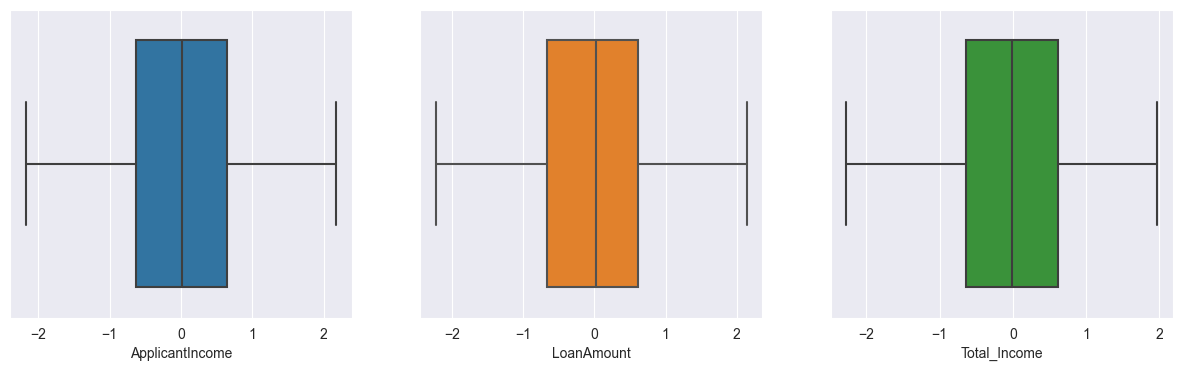

In [45]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))
axes = axes.flat

for index, column in enumerate(outlier_columns):
    sns.boxplot(
        data=data,
        x=column,
        color=(list(plt.rcParams['axes.prop_cycle']*2)[index]['color']),
        ax=axes[index]
    )

print('After removing outliers using quantile data size is :', data.shape[0])

## __Handling Categorical Features__

In [46]:
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [47]:
for column in cat_cols:
    data[column] = data[column].astype(dtype='str')


In [48]:
from sklearn.preprocessing import OrdinalEncoder

encode = OrdinalEncoder()
data[cat_cols] = encode.fit_transform(data[cat_cols])

In [49]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0        0.0            0.0         0.706932   
1     1.0      1.0         1.0        0.0            0.0         0.309511   
2     1.0      1.0         0.0        0.0            1.0        -0.569037   
3     1.0      1.0         0.0        1.0            0.0        -0.889801   
4     1.0      0.0         0.0        0.0            0.0         0.744176   

   LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  LoanStatus  \
0    0.016357             360.0             1.0            2.0           1   
1    0.016357             360.0             1.0            0.0           0   
2   -1.480791             360.0             1.0            2.0           1   
3   -0.210080             360.0             1.0            2.0           1   
4    0.352709             360.0             1.0            2.0           1   

   Total_Income  
0      0.195471  
1      0.271122  
2     -1.439243  
3     -0.182982  
4      0.235231

## __Handling Feature Scaling__

In [50]:
from sklearn.preprocessing import StandardScaler

# creating an object for the class
scale = StandardScaler()

# scaling the data 
data[numeric_skew_cols] = scale.fit_transform(data[numeric_skew_cols])

# __Build The Model__

## __6.1 Determine Features & Target Variables__

In [51]:
# Splitting the dataset into target(X) and features(y)
X = data.drop('LoanStatus', axis=1)
y = data['LoanStatus']

In [52]:
from collections import Counter
Counter(y)

Counter({1: 399, 0: 175})

## __6.2 Split the dataset into Traing and Test sets__

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1999)

In [54]:
# checking the row and columns of the train and test data
print('X_train  shape:', X_train.shape)
print('X_test   shape:', X_test.shape)
print('y_train  shape:', Counter(y_train))
print('y_test   shape:',Counter(y_test))

X_train  shape: (459, 11)
X_test   shape: (115, 11)
y_train  shape: Counter({1: 319, 0: 140})
y_test   shape: Counter({1: 80, 0: 35})


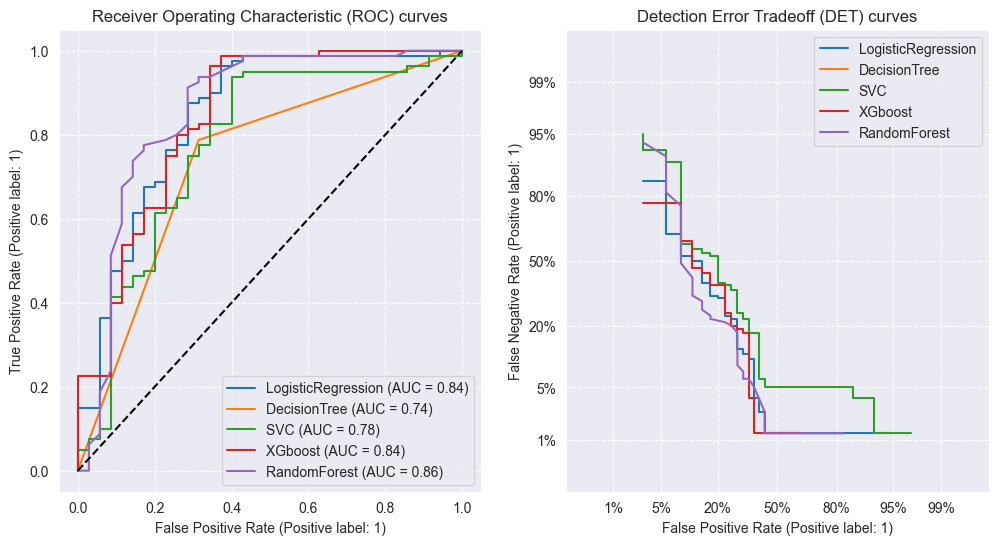

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

classifiers = {
    'LogisticRegression' : LogisticRegression(random_state=1),
    'DecisionTree' : DecisionTreeClassifier(random_state=1),
    'SVC' : SVC(random_state=1),
    'XGboost' : XGBClassifier(),
    'RandomForest' : RandomForestClassifier(random_state=1)
}

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, [ax_Roc, ax_Dot] = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

for name, clf_model in classifiers.items():
    clf_model.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf_model, X_test, y_test, ax=ax_Roc, name=name)
    DetCurveDisplay.from_estimator(clf_model, X_test, y_test, ax=ax_Dot, name=name)

ax_Roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_Dot.set_title("Detection Error Tradeoff (DET) curves")

ax_Roc.plot([0, 1], [0, 1], color='k', linestyle='--')

ax_Roc.grid(linestyle="--")
ax_Dot.grid(linestyle="--")

plt.legend()
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [57]:
# Define the hyperparameter search space for each model
logistic_regression_params = {'C': uniform(0, 10)}
random_forest_params = {
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf'  : [1, 2, 4],
    'bootstrap'         : [True, False]
}


In [58]:
# Define the models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

In [59]:
# Define the randomized search with 5-fold cross validation
logistic_regression_random_search = RandomizedSearchCV(
    logistic_regression, 
    param_distributions=logistic_regression_params, 
    n_iter=100, 
    cv=2, 
    random_state=42, 
    verbose=2
)

random_forest_random_search = RandomizedSearchCV(
    random_forest, 
    param_distributions=random_forest_params, 
    n_iter=100, 
    cv=2, 
    random_state=42, 
    verbose=2
)

In [60]:
# Fit the randomized search to the training data
logistic_regression_random_search.fit(X_train, y_train)
random_forest_random_search.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END ................................C=3.745401188473625; total time=   0.0s
[CV] END ................................C=3.745401188473625; total time=   0.0s
[CV] END .................................C=9.50714306409916; total time=   0.0s
[CV] END .................................C=9.50714306409916; total time=   0.0s
[CV] END ................................C=7.319939418114051; total time=   0.0s
[CV] END ................................C=7.319939418114051; total time=   0.0s
[CV] END ................................C=5.986584841970366; total time=   0.0s
[CV] END ................................C=5.986584841970366; total time=   0.0s
[CV] END ...............................C=1.5601864044243652; total time=   0.0s
[CV] END ...............................C=1.5601864044243652; total time=   0.0s
[CV] END ...............................C=1.5599452033620265; total time=   0.0s
[CV] END ...............................C=1.55

[CV] END ...............................C=3.8867728968948203; total time=   0.0s
[CV] END ................................C=2.713490317738959; total time=   0.0s
[CV] END ................................C=2.713490317738959; total time=   0.0s
[CV] END ................................C=8.287375091519294; total time=   0.0s
[CV] END ................................C=8.287375091519294; total time=   0.0s
[CV] END ................................C=3.567533266935893; total time=   0.0s
[CV] END ................................C=3.567533266935893; total time=   0.0s
[CV] END ...............................C=2.8093450968738076; total time=   0.0s
[CV] END ...............................C=2.8093450968738076; total time=   0.0s
[CV] END ................................C=5.426960831582485; total time=   0.0s
[CV] END ................................C=5.426960831582485; total time=   0.0s
[CV] END ...............................C=1.4092422497476265; total time=   0.0s
[CV] END ...................

[CV] END bootstrap=False, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END bootstrap=False, min_samples_leaf=4, min_

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [61]:
# Print the best hyperparameters for each model
print("Logistic Regression Best Parameters:", logistic_regression_random_search.best_params_)
print("Random Forest Best Parameters:", random_forest_random_search.best_params_)

Logistic Regression Best Parameters: {'C': 7.080725777960454}
Random Forest Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'bootstrap': True}


In [62]:
# Evaluate the models on the test data using the best hyperparameters
logistic_regression_best = LogisticRegression(**logistic_regression_random_search.best_params_)
random_forest_best = RandomForestClassifier(**random_forest_random_search.best_params_)

In [63]:
logistic_regression_best.fit(X_train, y_train)
random_forest_best.fit(X_train, y_train)

logistic_regression_accuracy = logistic_regression_best.score(X_test, y_test)
random_forest_accuracy = random_forest_best.score(X_test, y_test)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

Logistic Regression Accuracy: 0.8434782608695652
Random Forest Accuracy: 0.8434782608695652


In [70]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def metrics(model):

    model.fit(X_train, y_train)
    global y_pred
    y_pred = model.predict(X_test)

    trainacc = model.score(X_train, y_train)
    testacc = model.score(X_test, y_test)
    
    score_df = pd.DataFrame(
        [trainacc*100, testacc*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Score(%)']
        )

    print(model, '\n')
    
    print(score_df, '\n')
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    
    report = classification_report(y_test, y_pred)
    print(report)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    return model

LogisticRegression(C=7.080725777960454) 

                 Score(%)
Train Accuracy  81.481481
Test Accuracy   84.347826 

              precision    recall  f1-score   support

           0       0.95      0.51      0.67        35
           1       0.82      0.99      0.90        80

    accuracy                           0.84       115
   macro avg       0.89      0.75      0.78       115
weighted avg       0.86      0.84      0.83       115

0.8434782608695652


LogisticRegression(C=7.080725777960454)

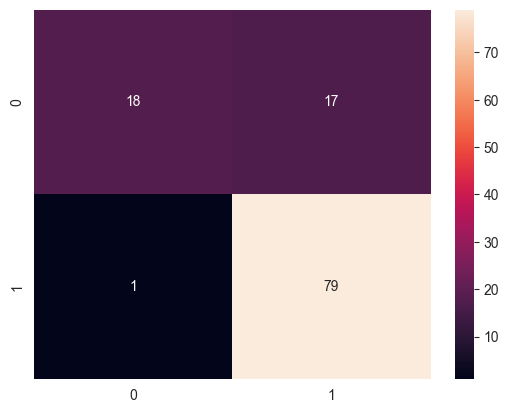

In [71]:
metrics(logistic_regression_best)

RandomForestClassifier(min_samples_leaf=4) 

                 Score(%)
Train Accuracy  83.224401
Test Accuracy   84.347826 

              precision    recall  f1-score   support

           0       0.95      0.51      0.67        35
           1       0.82      0.99      0.90        80

    accuracy                           0.84       115
   macro avg       0.89      0.75      0.78       115
weighted avg       0.86      0.84      0.83       115

0.8434782608695652


RandomForestClassifier(min_samples_leaf=4)

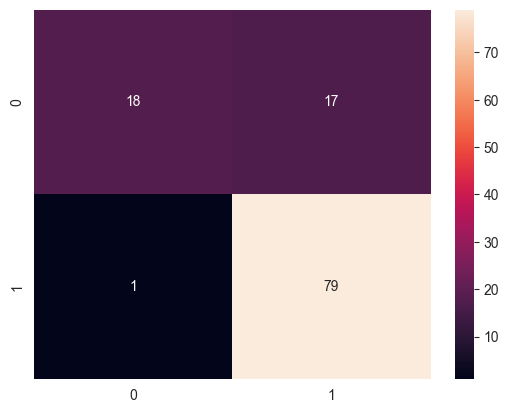

In [72]:
metrics(random_forest_best)